# Load and Inspect the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\Calories Burnt Prediction\Dataset\calories.csv')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [5]:
print("🔹 Shape:", df.shape)
print("\n🔹 Data Types:\n", df.dtypes)
print("\n🔹 Missing Values:\n", df.isnull().sum())
print("\n🔹 Preview of Dataset:\n", df.head())

🔹 Shape: (15000, 9)

🔹 Data Types:
 User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

🔹 Missing Values:
 User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

🔹 Preview of Dataset:
     User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  


# Data Cleaning

In [7]:
df.shape

(15000, 9)

In [9]:
df.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [10]:
# missing values
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [11]:
# There are no missing values in the dataset.

In [13]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


Here’s what we’ll do next:

Drop `User_ID` (not useful for modeling)

Encode `Gender` (categorical to numeric)

In [15]:
df_cleaned = df.drop(columns=['User_ID'], axis=1)
df_cleaned['Gender'] = df_cleaned['Gender'].map({'male':1, 'female':0})
df_cleaned.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


# Exploratory Data Analysis (EDA)

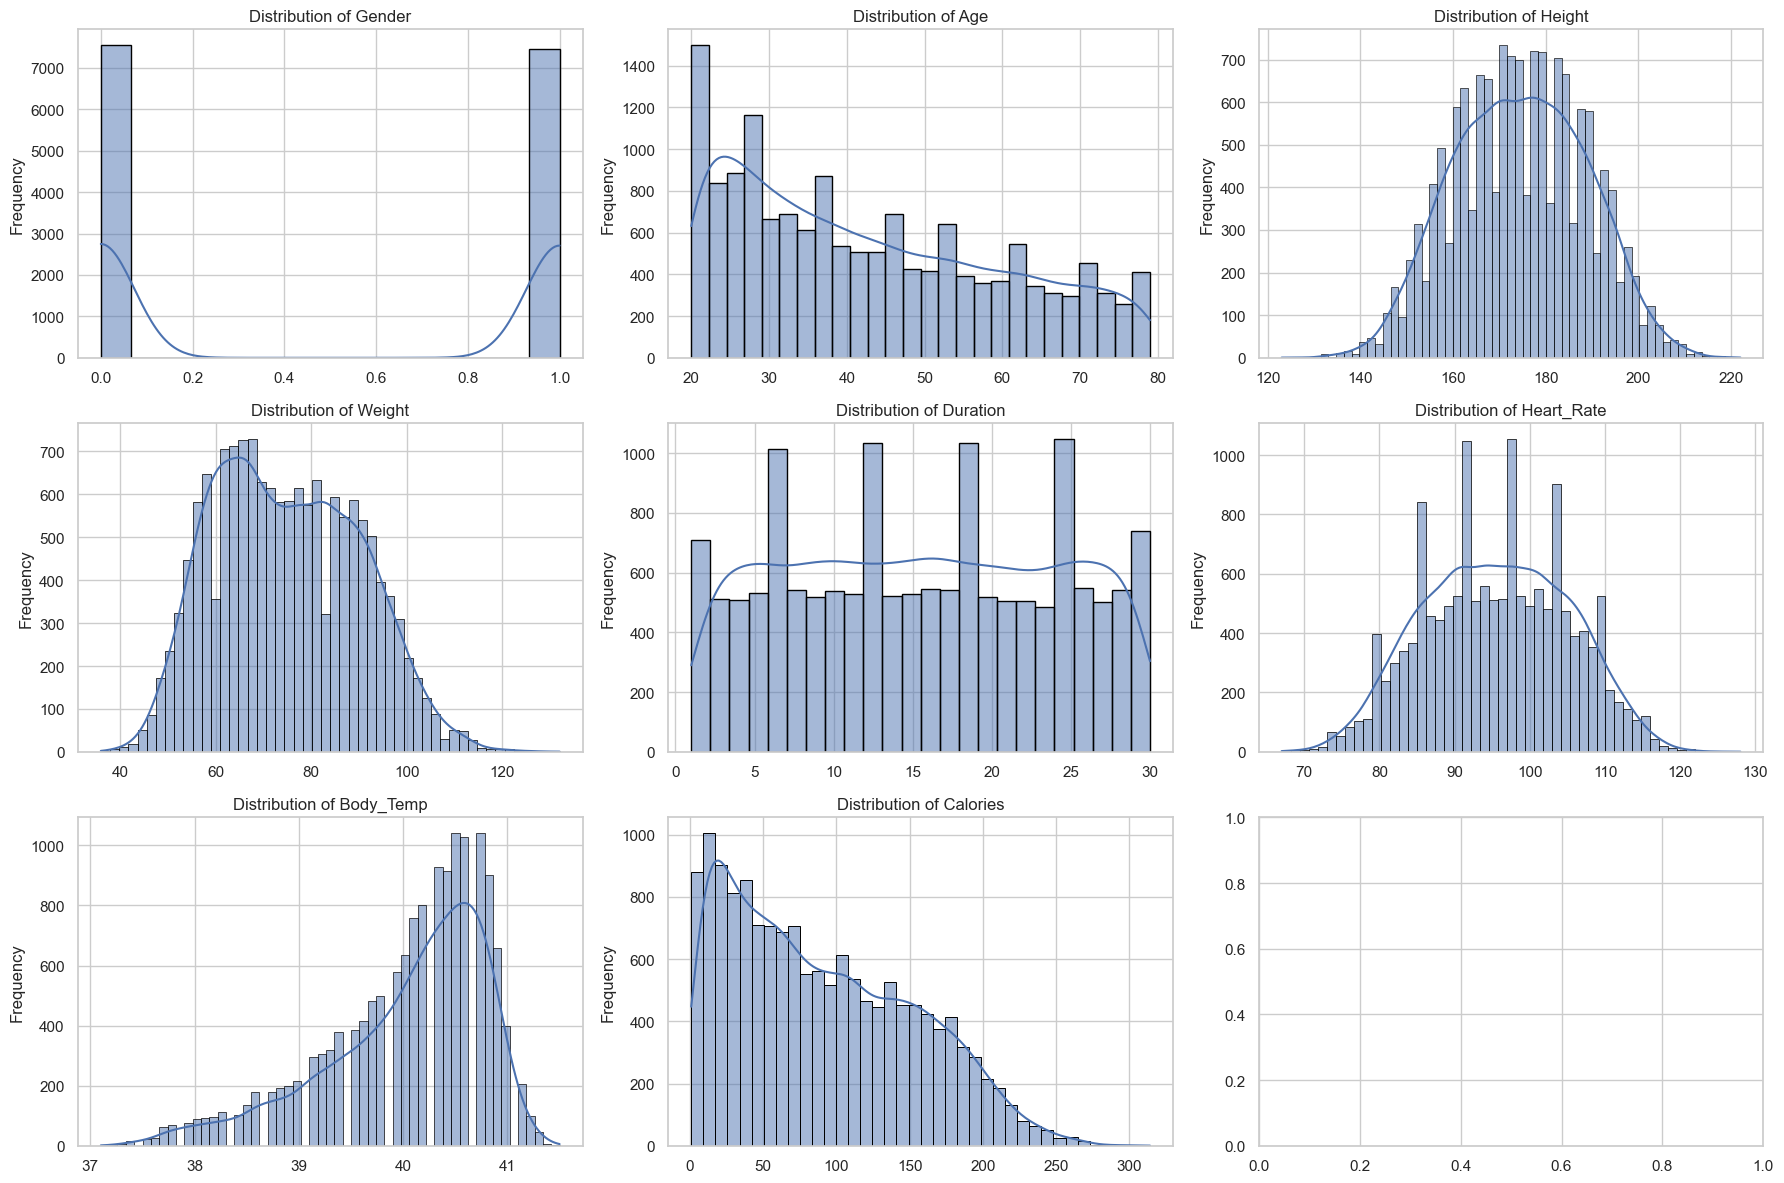

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot distributions for all numeric features
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

numeric_cols = df_cleaned.columns

for i, col in enumerate(numeric_cols):
    sns.histplot(df_cleaned[col], kde=True, ax=axes[i], palette='pastel', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Key observations from the histograms:

`Age`, `Height`, and `Weight` are relatively normally distributed.

`Duration`, `Heart_Rate`, and `Body_Temp` show a bit of skewness.

`Calories` (target) has a right-skewed distribution — common in real-world calorie burn data.

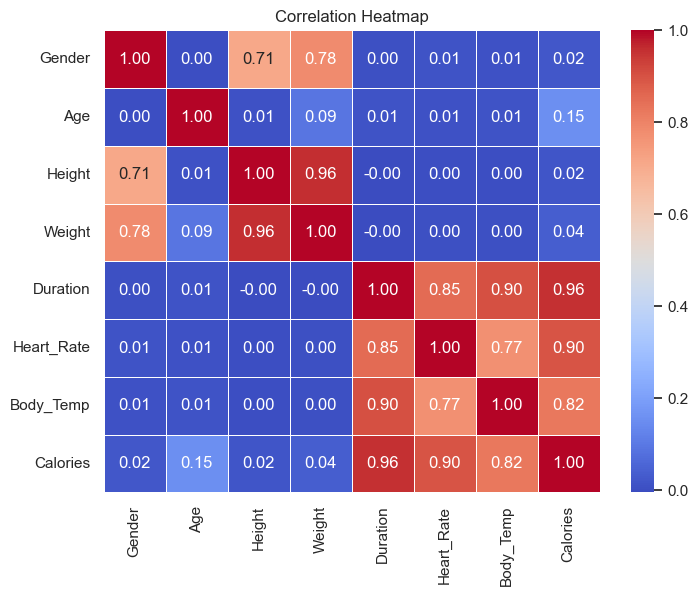

In [22]:
# Compute correlation matrix
corr_matrix = df_cleaned.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Compact Summary
* Top predictors of Calories:

* Duration (0.96), Heart_Rate (0.90), Body_Temp (0.82) – strong positive correlations.

* Less relevant features:

* Age (0.15), Gender (0.02), Height (0.02) – weak or no correlation with Calories.

* Other strong correlations:

Weight & Height (0.96), Weight & Gender (0.78).

Model insight:

* Focus on Duration, Heart_Rate, and Body_Temp for calorie prediction.

# Feature Engineering

In [23]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [26]:
df_engineered  = df_cleaned.copy()

# Height in meters for BMI
df_engineered['Height_m']  = df_engineered['Height']/100
df_engineered['BMI'] = df_engineered['Weight'] / (df_engineered['Height_m'] ** 2)

# Effort = Heart_Rate * Duration
df_engineered['Effort'] = df_engineered['Heart_Rate'] * df_engineered['Duration']

# Drop intermediate Height_m column
df_engineered.drop(columns='Height_m', inplace=True)

# Show updated dataframe head
df_engineered.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Effort
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781,3045.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842,1316.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910,440.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109,1300.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063,810.0


Added:

`BMI`: Body Mass Index

`Effort`: Heart Rate × Duration

These will help capture physiological and workout intensity factors.

# Train/Test Split

In [27]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_engineered.drop(columns='Calories')
y = df_engineered['Calories']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((12000, 9), (3000, 9), (12000,), (3000,))

# 🤖 Model Training and Evaluation Code

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}


# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"🔍 {name} Results:")
    print(f"  MAE:  {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"  RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
    print(f"  R²:   {r2_score(y_test, y_pred):.2f}\n")

🔍 Linear Regression Results:
  MAE:  5.83
  RMSE: 7.90
  R²:   0.98

🔍 Random Forest Results:
  MAE:  1.69
  RMSE: 2.63
  R²:   1.00

🔍 XGBoost Results:
  MAE:  1.40
  RMSE: 1.98
  R²:   1.00



In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define model
rf = RandomForestRegressor(random_state=42)

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=25,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit model
rf_random.fit(X_train, y_train)

# Best model
best_rf = rf_random.best_estimator_
print("Best Parameters:", rf_random.best_params_)

# Evaluate
y_pred = best_rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f"\nTuned Random Forest Performance:")
print(f"  MAE:  {mean_absolute_error(y_test, y_pred):.2f}")
print(f"  RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"  R²:   {r2_score(y_test, y_pred):.2f}")


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40}

Tuned Random Forest Performance:
  MAE:  1.66
  RMSE: 2.62
  R²:   1.00


In [30]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Random search with cross-validation
xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=25,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit model
xgb_random.fit(X_train, y_train)

# Best model
best_xgb = xgb_random.best_estimator_
print("Best Parameters:", xgb_random.best_params_)

# Evaluate
y_pred = best_xgb.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f"\nTuned XGBoost Performance:")
print(f"  MAE:  {mean_absolute_error(y_test, y_pred):.2f}")
print(f"  RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"  R²:   {r2_score(y_test, y_pred):.2f}")


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}

Tuned XGBoost Performance:
  MAE:  0.96
  RMSE: 1.37
  R²:   1.00


# `For Overfitting check`

In [34]:
# Updated version of the model evaluation code for the tuned Random Forest and XGBoost models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f"📊 {name} Performance:")
    print(f"  ▶️ Training Set:")
    print(f"     R²:   {r2_score(y_train, y_train_pred):.3f}")
    print(f"     RMSE: {mean_squared_error(y_train, y_train_pred, squared=False):.2f}")
    
    print(f"  ▶️ Test Set:")
    print(f"     R²:   {r2_score(y_test, y_test_pred):.3f}")
    print(f"     RMSE: {mean_squared_error(y_test, y_test_pred, squared=False):.2f}")
    print()

evaluate_code = """
# Evaluate tuned Random Forest
evaluate_model("Tuned Random Forest", best_rf, X_train, y_train, X_test, y_test)

# Evaluate tuned XGBoost
evaluate_model("Tuned XGBoost", best_xgb, X_train, y_train, X_test, y_test)
"""

evaluate_code  # Returning the code to paste into your notebook


'\n# Evaluate tuned Random Forest\nevaluate_model("Tuned Random Forest", best_rf, X_train, y_train, X_test, y_test)\n\n# Evaluate tuned XGBoost\nevaluate_model("Tuned XGBoost", best_xgb, X_train, y_train, X_test, y_test)\n'

In [35]:
# Evaluate tuned Random Forest
evaluate_model("Tuned Random Forest", best_rf, X_train, y_train, X_test, y_test)

# Evaluate tuned XGBoost
evaluate_model("Tuned XGBoost", best_xgb, X_train, y_train, X_test, y_test)


📊 Tuned Random Forest Performance:
  ▶️ Training Set:
     R²:   1.000
     RMSE: 1.01
  ▶️ Test Set:
     R²:   0.998
     RMSE: 2.62

📊 Tuned XGBoost Performance:
  ▶️ Training Set:
     R²:   1.000
     RMSE: 0.93
  ▶️ Test Set:
     R²:   1.000
     RMSE: 1.37



In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_simple = df_engineered[['Effort']]
y = df_engineered['Calories']

model = LinearRegression()
model.fit(X_simple, y)
y_pred = model.predict(X_simple)

print("R² using only 'Effort':", r2_score(y, y_pred))


R² using only 'Effort': 0.9498391869212008


R² = 0.95 Using Only `‘Effort’`
Interpretation: The `Effort` feature (Heart Rate × Duration) explains ~95% of the variance in Calories.

That’s a very strong single predictor — the problem is still relatively simple for a machine learning model.

✅ Final Verdict:
Not overfitted: The models generalize well and don’t rely on leaked info.

High performance is justified by the presence of a highly predictive feature (`Effort`).

# Export the Best Model Using `pickle`

In [37]:
import pickle

# Save model
with open('calories_model.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)

# Save feature columns
with open('features.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)
